# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Solution

The function _DataBlocking_ is here modified with respect to exercise 01 to take an integrand function ($integ$) and a probability distribution ($prob$) from which $M=10^6$ points $x$ are sampled. Both these arguments are pointers to an abstract class _BaseFunction_, from which one can build derived classes, so that different functions can be integrated and different samplings (importance sampling) can be used. _DataBlocking_ accumulates the quantity $integ(x)/prob(x)$ on the sampled points $x$ and computes their blocking averages, which are the esitmates of the integral, and their uncertainties.

The two probability distributions used are _UniformSampling_, namely the distribution $p_{unif}(x)=1$ for $x \in [0,1]$, $p_{unif}(x)=0$ otherwise, and _ImportanceSampling_, namely
$$p_{imp}(x)=\frac{\pi}{2} \left( 1 - \frac{1}{2} \left( \frac{\pi}{2} x \right)^2 + \frac{1}{24} \left( \frac{\pi}{2} x \right)^4 \right) \; \; \; \; for \; x \in [0,1] \\
p_{imp}(x)=0 \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; \; otherwise$$
which is the Taylor expansion of the cosine to the fourth order in $x=0$ (the second order expansion cannot be used as it is not positive in the whole interval $[0,1]$) and must be normalized.

The importance sampling is obtained with an accept-reject method implemented in the class _Random_, which can sample from any real function of a real variable (which is provided as an argument) being non-null in a finite interval.

By comparing the two images below we can conclude that the use of the importance sampling causes the estimations of the integral to converge to the exact value more rapidly than the uniform sampling. The error is also more than one order of magnitude smaller than in the latter case. In both cases the estimation of $I$ is compatible within one STD with the correct value.

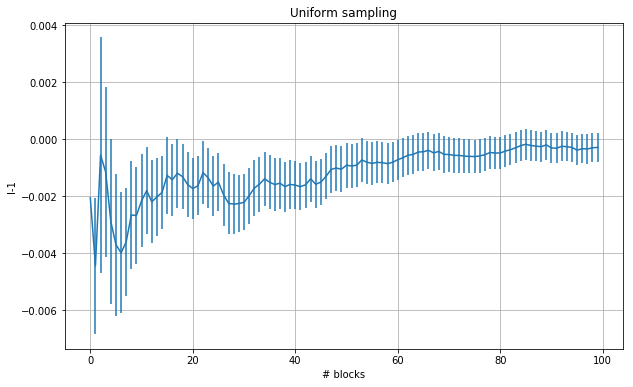

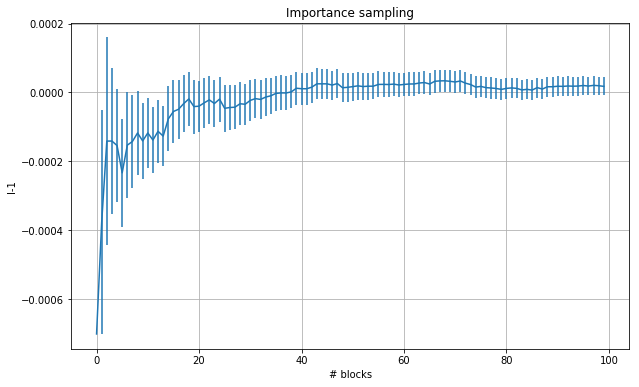

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

uniform=np.loadtxt("uniform_sampling.out")
importance=np.loadtxt("importance_sampling.out")

plt.figure(figsize=(10,6))
plt.errorbar(uniform[:,0], uniform[:,1], yerr=uniform[:,2])
plt.title('Uniform sampling')
plt.xlabel('# blocks')
plt.ylabel('I-1')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.errorbar(importance[:,0], importance[:,1], yerr=importance[:,2])
plt.title('Importance sampling')
plt.xlabel('# blocks')
plt.ylabel('I-1')
plt.grid(True)
plt.show()

The following cell is just a qualitative control to check that the accept-reject method of the class _Random_ works correctly and samples the given probability (see above). A few commented lines in <font face="Courier">ex02.1.cpp</font> produce an output file called <font face="Courier">accrejtest.out</font> containing the random numbers produced by the method. In the image the (normalized) histogram of these numbers is compared with the importance sampling distribution that we want to sample. The integrand function is also plotted to show how similar it is to the importance sampling distribution chosen.

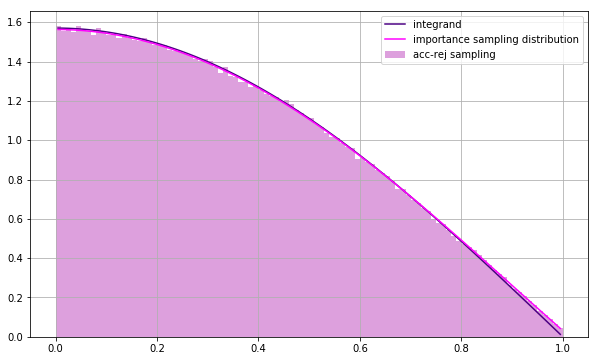

In [2]:
from math import pi

def integrand(x):
    return pi/2*np.cos(pi/2*x)

def importance_sampling(x):
    norm = pi/2*(1-pi*pi/24+pi**4/1920)
    return pi/2*(1-1/2*(pi/2*x)**2+1/24*(pi/2*x)**4)/norm

nums=np.loadtxt("accrejtest.out")

plt.figure(figsize=(10,6))
bin_heights, bin_borders, _ = plt.hist(nums, bins=100, density=True, color='plum', label='acc-rej sampling')
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
plt.plot(bin_centers, integrand(bin_centers), color='indigo', label='integrand')
plt.plot(bin_centers, importance_sampling(bin_centers), color='magenta', label='importance sampling distribution')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### Solution

The code uses a class _Vector3D_, whose data memebers are the cartesian coordinates of a point in 3D space. It contains (among other things) two methods called _discRWStep_ and _contRWStep_, that move the point to the next step of a random walk on a cubic lattice and in the continuum space respectively. The first one requires the lattice constant and two random numbers uniformely distributed in $[0,3)$ and $[0,2)$ to decide the direction of the move, while the latter requires the length of the step and the two angles $\theta$ and $\phi$ obtained by sampling uniformely the solid angle. Such sampling is obtained applying the inverse of the cumulative method for $\theta$: $\theta = arccos(1-2r)$ with $r$ uniformely distributed in $[0,1)$, while $\phi$ is simply drawn from a uniform distribution in $[0,2\pi)$.

After each step is produced for all the $M=10^4$ random walks, the average value of $L=\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ and its uncertainty are computed dividing the random walks in $100$ blocks: each block returns a measure of $L$, where the average of $|\vec{r}_N|^2$ is computed within the block, and then the mean and the STD of the mean of these measures are computed. The function _DataBlocking_ of exercise 01 was not used here because it is not necessary to store the averages and errors for all blocks but only the final ones.

The resulting $\langle L \rangle$ and its uncertianty are plotted below as a function of the number of steps and fitted with a curve $f(N)=k\sqrt{N}$.

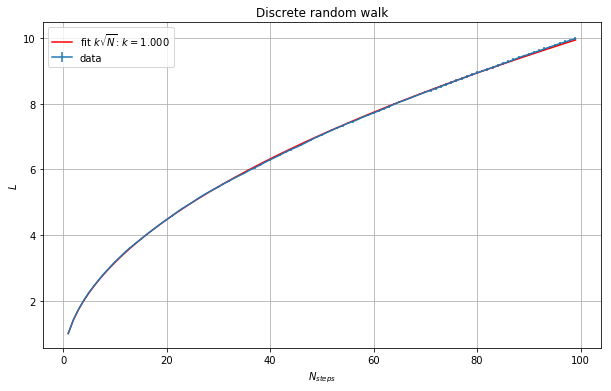

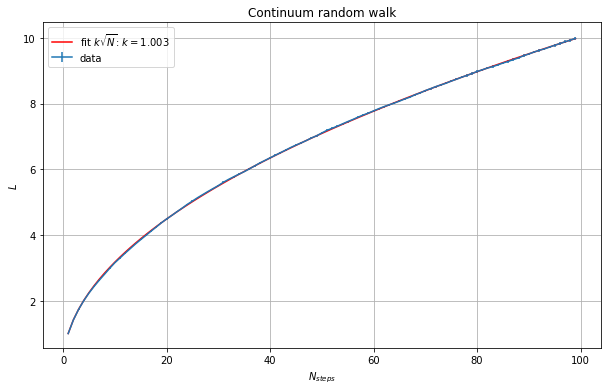

In [3]:
from scipy.optimize import curve_fit

def func(N, k):
    return k * np.sqrt(N)

discrete=np.loadtxt("discrete_random_walk.out")
continuum=np.loadtxt("continuum_random_walk.out")

popt, _ = curve_fit(func, discrete[:,0], discrete[:,1])

plt.figure(figsize=(10,6))
plt.errorbar(discrete[:,0], discrete[:,1], yerr=discrete[:,2], label='data')
plt.plot(discrete[:,0], func(discrete[:,0], *popt), 'r-', label='fit $k\sqrt{N}$: $k=%5.3f$' % tuple(popt))
plt.title('Discrete random walk')
plt.xlabel('$N_{steps}$')
plt.ylabel('$L$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

popt, _ = curve_fit(func, continuum[:,0], continuum[:,1])

plt.figure(figsize=(10,6))
plt.errorbar(continuum[:,0], continuum[:,1], yerr=continuum[:,2], label='data')
plt.plot(continuum[:,0], func(continuum[:,0], *popt), 'r-', label='fit $k\sqrt{N}$: $k=%5.3f$' % tuple(popt))
plt.title('Continuum random walk')
plt.xlabel('$N_{steps}$')
plt.ylabel('$L$')
plt.legend(loc='best')
plt.grid(True)
plt.show()

As we have seen, from the diffusion equation
\begin{equation}
\frac{\partial p (x,t)}{\partial t} = D \frac{\partial^2 p (x,t)}{\partial x^2},
\end{equation}
with starting condition $p(x,t=0)=\delta(x)$ (i. e. the random walk starts from the origin at $t=0$ with probability $1$), one obtains as a solution the gaussian centered in the origin and with variance $\sigma^2=2Dt$,
\begin{equation}
p (x,t) = \frac{1}{\sqrt{4 \pi Dt}} e^{- \frac{x^2}{4Dt}}
\end{equation}
from which it is straightforward to obtain:
\begin{equation}
\langle x^2(t) \rangle _{RW}=2Dt
\end{equation}
Since we are computing the square root of this value it makes sense that, if the behaviour is diffusive, it will grow proportionally to the square root of $N_{steps}$ (which stands for the time in this discrete case). Moreover, since from the fit we have found the value $k=1$, we can deduce that the diffusion coefficient is $D=\frac{1}{2}$.